# Clusterization


In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline 

In [2]:
df=pd.read_excel('data_final.xlsx')
df

,Пол,Город,Позиция,Старшинство,Ежегодная зарплата(доллары)
0,Мужской,Хельсинки,Инженер-программист,Senior,80000.0
1,Мужской,Хельсинки,Бэкенд-разработчик,Senior,80000.0
2,Мужской,Хельсинки,Инженер-программист,Lead,120000.0
3,Мужской,Хельсинки,Фронтенд-разработчик,Junior,54000.0
4,Мужской,Хельсинки,Бэкенд-разработчик,Senior,62000.0
...,...,...,...,...,...
1629,Мужской,Гродно,Инженер-программист,Senior,44320.0
1630,Мужской,Минск,Специалист техподдержки и автоматизации процес...,Senior,20000.0
1631,Мужской,Минск,Графический дизайнер,Middle,34098.0
1632,Мужской,Минск,Системный администратор,Senior,24000.0


# K-means

# Firstly, let's examine "Позиция"

# Transformation of text data into numerical and the usage of the elbow method

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


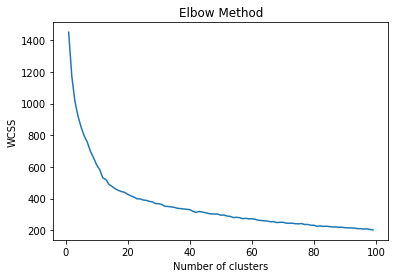

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Sample job descriptions in Russian
job_descriptions = df.iloc[:, 2]

# Create a list of Russian stop words using NLTK
russian_stop_words = stopwords.words('russian')

# Convert text data to numerical vectors
vectorizer = TfidfVectorizer(stop_words=russian_stop_words)

X = vectorizer.fit_transform(job_descriptions)

# Perform K-means clustering with elbow method
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plot the elbow curve to determine optimal number of clusters
plt.plot(range(1, 100), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Training the K-Means model on the dataset and printing the result


In [5]:
# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
kmeans.fit(X)

# Print the cluster labels
print("Cluster labels:", kmeans.labels_)

Cluster labels: [ 0  3  0 ... 14  1 18]


In [15]:
dfs = []
for i in range (0, 20):
    loc = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_kmeans_pos = pd.concat(dfs, axis=0, ignore_index=True)
df_kmeans_pos.to_excel('kmeans_pos.xlsx')

# Secondly, let's examine "Позиция" and "Зарплата"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


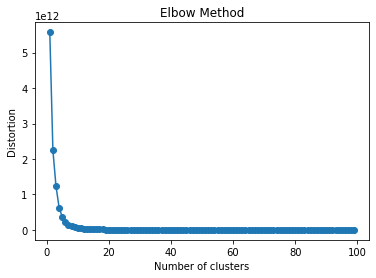

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

job_data = df.iloc[:, [2, 4]].values

job_descriptions = [x[0] for x in job_data]
salaries = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(job_descriptions)

X_mixed = np.column_stack((X.toarray(), salaries))

distortions = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_mixed)
    distortions.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 100), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [4]:
kmeans = KMeans(n_clusters = 16, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_mixed)

In [10]:
dfs = []
for i in range (0, 16):
    loc = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_kmeans_pos = pd.concat(dfs, axis=0, ignore_index=True)
df_kmeans_pos.to_excel('kmeans_pos_and_sal.xlsx')

# Thirdly, let's examine "Позиция" and "Старшинство"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


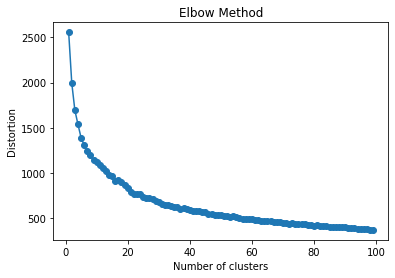

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

job_data = df.iloc[:, [2, 3]].values

job_descriptions = [x[0] for x in job_data]
seniority = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(job_descriptions)
X1 = vectorizer.fit_transform(seniority)

X_mixed = np.column_stack((X.toarray(), X1.toarray()))

distortions = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_mixed)
    distortions.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 100), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [39]:
kmeans1 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X_mixed)

In [40]:
dfs = []
for i in range (0, 10):
    loc = []
    for j in range(len(y_kmeans1)):
        if y_kmeans1[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_kmeans_pos_and_seniority = pd.concat(dfs, axis=0, ignore_index=True)
df_kmeans_pos_and_seniority.to_excel('kmeans_pos_and_seniority.xlsx')

# "Город" and "Зарплата"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


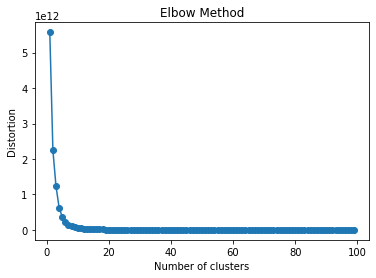

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

job_data = df.iloc[:, [1, 4]].values

cities = [x[0] for x in job_data]
salaries = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(cities)

X_mixed = np.column_stack((X.toarray(), salaries))

distortions = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_mixed)
    distortions.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 100), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [42]:
kmeans2 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(X_mixed)

In [43]:
dfs = []
a = 0
for i in range (0, 10):
    loc = []
    for j in range(len(y_kmeans2)):
        if y_kmeans2[j] == i:
            loc.append(j)
            a += 1
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_kmeans_city_and_sal = pd.concat(dfs, axis=0, ignore_index=True)
df_kmeans_city_and_sal.to_excel('kmeans_city_and_sal.xlsx')

#  Hierarchical


# "Позиция"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


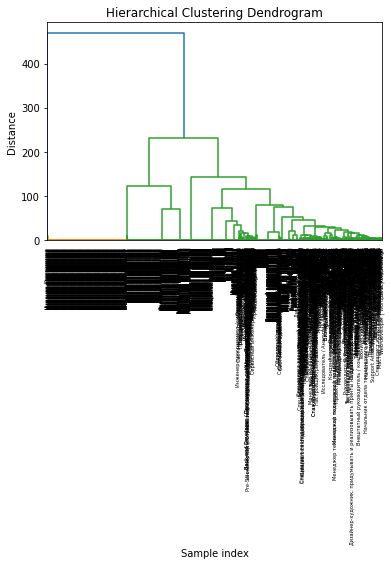

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

job_descriptions = df.iloc[:, 2].values
russian_stop_words = stopwords.words('russian')
vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(job_descriptions)

# Compute cosine similarity matrix for clustering
dist = 1 - cosine_similarity(X)

linkage_matrix = linkage(dist, method='ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=job_descriptions)
plt.show()

# Training the Hierarchical Clustering model on the dataset

In [16]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_model = model.fit(X.toarray())

In [21]:
clusters=fcluster(linkage_matrix, 5, criterion='maxclust')
clusters

array([1, 2, 1, ..., 5, 5, 5], dtype=int32)

In [25]:
max(clusters)

5

In [26]:
dfs = []
for i in range (1, 6):
    loc = []
    for j in range(len(clusters)):
        if clusters[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_hierarchical_pos = pd.concat(dfs, axis=0, ignore_index=True)
df_hierarchical_pos.to_excel('hierarchical_pos.xlsx')

# DBSCAN

# "Позиция" and "Зарплата"

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

job_data = df.iloc[:, [2, 4]].values

job_descriptions = [x[0] for x in job_data]
salaries = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(job_descriptions)

X_mixed = np.column_stack((X.toarray(), salaries))
# run DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=10)
clusters1 = dbscan.fit_predict(X_mixed)

print(clusters1)

[ 0  1 -1 ... -1 -1 -1]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
print(min(clusters1))
print(max(clusters1))

-1
13


In [37]:
dfs = []
for i in range (0, 14):
    loc = []
    for j in range(len(clusters1)):
        if clusters1[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_dbscan_pos_and_sal = pd.concat(dfs, axis=0, ignore_index=True)
df_dbscan_pos_and_sal.to_excel('dbscan_pos_and_sal.xlsx')

# "Город" and "Позиция"

In [41]:
job_data = df.iloc[:, [1, 2]].values

job_descriptions = [x[0] for x in job_data]
seniority = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(job_descriptions)
X1 = vectorizer.fit_transform(seniority)

X_mixed = np.column_stack((X.toarray(), X1.toarray()))

dbscan2 = DBSCAN(eps=0.4, min_samples=10)
clusters2 = dbscan.fit_predict(X_mixed)

In [42]:
print(min(clusters2))
print(max(clusters2))

-1
19


In [43]:
dfs = []
for i in range (0, 20):
    loc = []
    for j in range(len(clusters2)):
        if clusters2[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_dbscan_city_and_pos = pd.concat(dfs, axis=0, ignore_index=True)
df_dbscan_city_and_pos.to_excel('dbscan_city_and_pos.xlsx')

# Distribution-based clustering(GMM model)

# "Город" and "Зарплата"

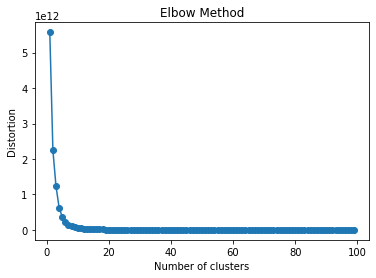

In [44]:
from sklearn.mixture import GaussianMixture
job_data = df.iloc[:, [1, 4]].values

cities = [x[0] for x in job_data]
salaries = [x[1] for x in job_data]

russian_stop_words = stopwords.words('russian')

vectorizer = TfidfVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(cities)

X_mixed = np.column_stack((X.toarray(), salaries))

distortions = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_mixed)
    distortions.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 100), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [45]:
# run Gaussian Mixture Models clustering
gmm = GaussianMixture(n_components=11, random_state=42)
gmm.fit(X_mixed)

labels2 = gmm.predict(X_mixed)

# print the clustering results
print(labels2)

[7 7 7 ... 0 0 0]


In [46]:
len(labels2)

1634

In [47]:
dfs = []
for i in range (0, 20):
    loc = []
    for j in range(len(clusters2)):
        if clusters2[j] == i:
            loc.append(j)
    df_new = pd.concat([df.iloc[loc]], ignore_index=True)
    dfs.append(pd.DataFrame({len(loc)}))
    dfs.append(pd.DataFrame({}))
    dfs.append(df_new)
df_gmm_city_and_sal = pd.concat(dfs, axis=0, ignore_index=True)
df_gmm_city_and_sal.to_excel('gmm_city_and_sal.xlsx')